# Info
Name:  

    Explor_AERONET

Purpose:  

    Explore AERONET values for single sites linked to high altitude AOD values
  
Input:

    none at command line
    see methods of module

Output:
   
    plots
  
Keywords:

    none
  
Dependencies:

    - numpy
    - scipy : for saving and reading
    - math
    - pdb
    - datetime
    - load_utils
  
Needed Files:

    - AEERONET files
  
  
Modification History:

    Wrtten: Samuel LeBlanc, NASA Ames, from Santa Cruz, 2017-05-19
    Modified: 

# Import the required python modules and set paths

In [2]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib notebook
#import path

In [3]:
import load_utils as lu
from path_utils import getpath

In [4]:
fp = getpath('ORACLES')

Return path named:  ORACLES /mnt/c/Users/sleblanc/Research/ORACLES/


In [3]:
fp = 'C:\\Users\\sleblan2\\Research\\ORACLES\\data_other\\'

In [4]:
fp2 = 'C:\\Users\\sleblan2\\Research\\ORACLES\\data_other_2017\\'

In [5]:
def nat_sort(l):
    n = max([len(j) for j in l])+1
    l.sort(key=lambda x: '{0:0>{n}}'.format(x,n=n).lower())

# Load the files

## Load the Aeronet Mount_Chacaltaya

In [5]:
a = lu.load_aeronet(fp+'150708_150708_Mount_Chacaltaya.lev20')

Opening file: C:\Users\sleblan2\Research\ORACLES\data_other\150708_150708_Mount_Chacaltaya.lev20


In [6]:
a.keys()

['AOT_551',
 'TripletVar_532',
 'AOT_532',
 'AOT_667',
 'AOT_531',
 'TripletVar_412',
 '440675AngstromPolar',
 'AOT_1640',
 'WaterError',
 'AOT_380',
 'Location',
 '500870Angstrom',
 'Dateddmmyy',
 'AOT_412',
 'Email',
 'AOT_555',
 'AOT_490',
 'long',
 'TripletVar_1640',
 'Solar_Zenith_Angle',
 'Last_Processing_Dateddmmyyyy',
 '340440Angstrom',
 'PI',
 'TripletVar_340',
 'AOT_675',
 'TripletVar_531',
 'TripletVar_380',
 'TripletVar_440',
 'TripletVar_500',
 '380500Angstrom',
 'AOT_443',
 'AOT_440',
 'TripletVar_667',
 '440675Angstrom',
 'Timehhmmss',
 'TripletVar_675',
 'Julian_Day',
 'TripletVar_1020',
 'TripletVar_870',
 'TripletVar_443',
 'Watercm',
 'AOT_500',
 'AOT_1020',
 'lat',
 'Nmeas',
 'header',
 '440870Angstrom',
 'AOT_870',
 'TripletVar_490',
 'elev',
 'TripletVar_551',
 'AOT_340',
 'TripletVar_555']

In [80]:
len(a['Timehhmmss'])

55

In [29]:
nm = [float(k[4:]) for k in a.keys() if k.startswith('AOT_')]
nm.sort()

In [31]:
a['wl'] = nm

In [38]:
aods = [k for k in a.keys() if k.startswith('AOT_')]

In [40]:
aods.sort()

In [43]:
aods.sort(key=lambda x: '{0:0>8}'.format(x).lower())

In [44]:
aods

['AOT_340',
 'AOT_380',
 'AOT_412',
 'AOT_440',
 'AOT_443',
 'AOT_490',
 'AOT_500',
 'AOT_531',
 'AOT_532',
 'AOT_551',
 'AOT_555',
 'AOT_667',
 'AOT_675',
 'AOT_870',
 'AOT_1020',
 'AOT_1640']

In [86]:
aod = []
for i in xrange(len(a['Timehhmmss'])):
    u = [a[d][i] for d in aods]
    aod.append(u)
a['aod'] = np.array(aod)

## Load the MLO AERONET

In [14]:
reload(lu)

<module 'load_utils' from 'load_utils.py'>

In [15]:
b = lu.load_aeronet(fp+'20160801_20161031_Mauna_Loa.lev15',version=3)

Opening file: C:\Users\sleblan2\Research\ORACLES\data_other\20160801_20161031_Mauna_Loa.lev15


In [16]:
b.keys()

['AOD_551nm',
 'AOD_532nm',
 'NAOD_531nm',
 'AOD_Empty_6',
 'AOD_500nm',
 '440675_Angstrom_ExponentPolar',
 'NAOD_620nm',
 'AOD_555nm',
 'NAOD_340nm',
 'NAOD_675nm',
 'AOD_Empty_1',
 'AOD_Empty_2',
 'AOD_Empty_3',
 'AOD_Empty_4',
 'AOD_Empty_5',
 'AOD_870nm',
 'NAOD_Empty_2',
 'AOD_779nm',
 'NAOD_551nm',
 'AOD_531nm',
 'NAOD_560nm',
 'AOD_490nm',
 'NAOD_870nm',
 'NAOD_555nm',
 'N500870_Angstrom_Exponent',
 'NAOD_865nm',
 'N440675_Angstrom_ExponentPolar',
 'NPrecipitable_Watercm',
 '440870_Angstrom_Exponent',
 'NAOD_Empty',
 'AOD_440nm',
 'Site_LatitudeDegrees',
 'NAOD_779nm',
 'Precipitable_Watercm',
 'Site_LongitudeDegrees',
 'NAOD_532nm',
 'AOD_510nm',
 'AOD_865nm',
 'AERONET_Instrument_Number',
 'NAOD_412nm',
 'NAOD_1640nm',
 '340440_Angstrom_Exponent',
 'NAOD_400nm',
 'NAOD_1020nm',
 '440675_Angstrom_Exponent',
 'AOD_1640nm',
 'N440675_Angstrom_Exponent',
 'AOD_675nm',
 'AOD_1020nm',
 'AOD_667nm',
 'header',
 'Data_Quality_Level',
 'N440870_Angstrom_Exponent',
 'AOD_380nm',
 'Timeh

In [35]:
nm = [float(k[4:-2]) for k in b.keys() if (k.startswith('AOD_')&k.endswith('nm'))]
nm.sort()

In [36]:
nm

[340.0,
 380.0,
 400.0,
 412.0,
 440.0,
 443.0,
 490.0,
 500.0,
 510.0,
 531.0,
 532.0,
 551.0,
 555.0,
 560.0,
 620.0,
 667.0,
 675.0,
 779.0,
 865.0,
 870.0,
 1020.0,
 1640.0]

In [37]:
b['wl'] = nm

In [49]:
baods = [k for k in b.keys() if (k.startswith('AOD_')&k.endswith('nm'))]

In [64]:
nat_sort(baods)

In [78]:
baods

['AOD_340nm',
 'AOD_380nm',
 'AOD_400nm',
 'AOD_412nm',
 'AOD_440nm',
 'AOD_443nm',
 'AOD_490nm',
 'AOD_500nm',
 'AOD_510nm',
 'AOD_531nm',
 'AOD_532nm',
 'AOD_551nm',
 'AOD_555nm',
 'AOD_560nm',
 'AOD_620nm',
 'AOD_667nm',
 'AOD_675nm',
 'AOD_779nm',
 'AOD_865nm',
 'AOD_870nm',
 'AOD_1020nm',
 'AOD_1640nm']

In [88]:
baod = []
for i in xrange(len(b['Timehhmmss'])):
    u = [b[d][i] for d in baods]
    baod.append(u)
b['aod'] = np.array(baod)

In [91]:
b['aod'].shape

(79L, 22L)

## Load the file for Sao Tomé

In [44]:
c = lu.load_aeronet(fp2+'170801_170930_Sao_Tome.lev10',version=2)

Opening file: C:\Users\sleblan2\Research\ORACLES\data_other_2017\170801_170930_Sao_Tome.lev10


In [45]:
c.keys()

['AOT_551',
 'TripletVar_532',
 'AOT_532',
 'AOT_667',
 'AOT_531',
 'TripletVar_412',
 '440675AngstromPolar',
 'AOT_1640',
 'WaterError',
 'AOT_380',
 'Location',
 '500870Angstrom',
 'Dateddmmyy',
 'AOT_412',
 'Email',
 'AOT_555',
 'AOT_490',
 'long',
 'TripletVar_1640',
 'Solar_Zenith_Angle',
 'Last_Processing_Dateddmmyyyy',
 '340440Angstrom',
 'PI',
 'TripletVar_340',
 'AOT_675',
 'TripletVar_531',
 'TripletVar_380',
 'TripletVar_440',
 'TripletVar_500',
 '380500Angstrom',
 'AOT_443',
 'AOT_440',
 'TripletVar_667',
 '440675Angstrom',
 'Timehhmmss',
 'TripletVar_675',
 'Julian_Day',
 'TripletVar_1020',
 'TripletVar_870',
 'TripletVar_443',
 'Watercm',
 'AOT_500',
 'AOT_1020',
 'lat',
 'Nmeas',
 'header',
 '440870Angstrom',
 'AOT_870',
 'TripletVar_490',
 'elev',
 'TripletVar_551',
 'AOT_340',
 'TripletVar_555']

In [46]:
from datetime import datetime, timedelta

In [47]:
list(c['Julian_Day'])

[221.37104199999999,
 221.43354199999999,
 221.456458,
 221.49604199999999,
 221.50020799999999,
 221.50230300000001,
 221.50438700000001,
 221.50647000000001,
 221.50855300000001,
 221.55022,
 221.55646999999999,
 221.581447,
 221.58353,
 221.58769699999999,
 221.59186299999999,
 221.59394699999999,
 221.59603000000001,
 221.59811300000001,
 221.60020800000001,
 221.60436300000001,
 221.606447,
 221.608542,
 221.610613,
 221.61788200000001,
 221.62520799999999,
 221.63721100000001,
 221.63864599999999,
 221.64584500000001,
 221.65324100000001,
 221.67262700000001,
 221.67979199999999,
 221.69583299999999,
 221.69847200000001,
 221.70574099999999,
 222.41055600000001,
 222.41472200000001,
 222.41680600000001,
 222.41887700000001,
 222.67706000000001,
 222.68900500000001,
 222.690405,
 222.69181699999999,
 222.693218,
 222.69461799999999,
 223.310428,
 223.375336,
 223.39588000000001,
 223.397963,
 223.41045099999999,
 223.41254599999999,
 223.41462999999999,
 223.41671299999999,
 223.4

In [48]:
dt = [datetime(2017,1,1)+timedelta(jd-1) for jd in list(c['Julian_Day'])]

<IPython.core.display.Javascript object>


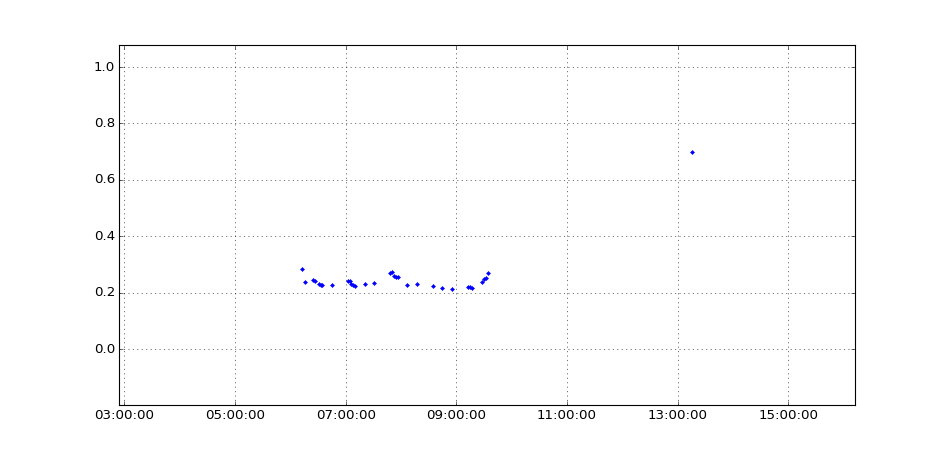

In [49]:
plt.figure()
plt.plot(dt,c['AOT_500'],'.')
plt.grid()

## Load the Ascension island aeronet data (from the airport)

In [50]:
d = lu.load_aeronet(fp2+'170801_170930_Ascension_Island.lev15',version=2)

Opening file: C:\Users\sleblan2\Research\ORACLES\data_other_2017\170801_170930_Ascension_Island.lev15


In [51]:
d['dt'] = [datetime(2017,1,1)+timedelta(jd-1) for jd in list(d['Julian_Day'])]

<IPython.core.display.Javascript object>


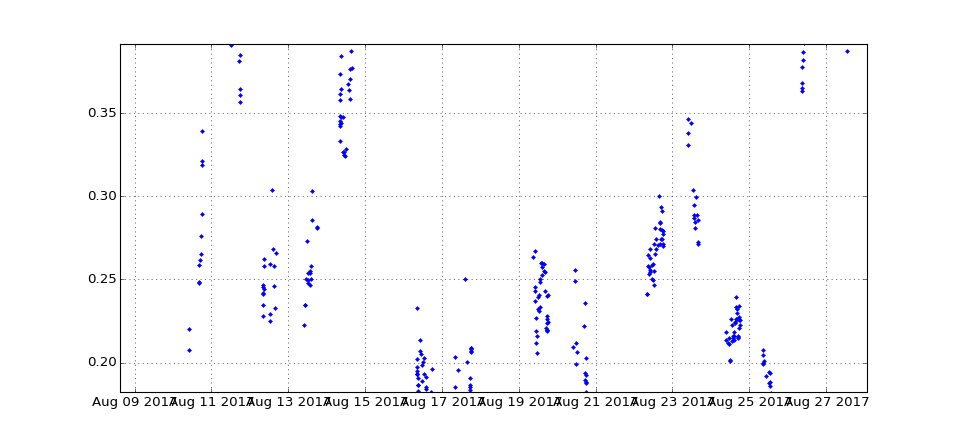

In [53]:
plt.figure()
plt.plot(d['dt'],d['AOT_500'],'.')
plt.grid()

## Load 2018 Misamfu

In [7]:
fp

u'/mnt/c/Users/sleblanc/Research/ORACLES/'

In [8]:
dm = lu.load_aeronet(fp+'data_other_2018/AERONET/20181219_20181219_Misamfu.lev15',version=3)

Opening file: /mnt/c/Users/sleblanc/Research/ORACLES/data_other_2018/AERONET/20181219_20181219_Misamfu.lev15


In [12]:
km = dm.keys()
km.sort()

In [13]:
km

['340440_Angstrom_Exponent',
 '380500_Angstrom_Exponent',
 '440675_Angstrom_Exponent',
 '440675_Angstrom_ExponentPolar',
 '440870_Angstrom_Exponent',
 '500870_Angstrom_Exponent',
 'AERONET_Instrument_Number',
 'AERONET_Site_Name',
 'AOD_1020nm',
 'AOD_1640nm',
 'AOD_340nm',
 'AOD_380nm',
 'AOD_400nm',
 'AOD_412nm',
 'AOD_440nm',
 'AOD_443nm',
 'AOD_490nm',
 'AOD_500nm',
 'AOD_510nm',
 'AOD_531nm',
 'AOD_532nm',
 'AOD_551nm',
 'AOD_555nm',
 'AOD_560nm',
 'AOD_620nm',
 'AOD_667nm',
 'AOD_675nm',
 'AOD_681nm',
 'AOD_709nm',
 'AOD_779nm',
 'AOD_865nm',
 'AOD_870nm',
 'AOD_Empty',
 'AOD_Empty_1',
 'AOD_Empty_2',
 'AOD_Empty_3',
 'AOD_Empty_4',
 'Data_Quality_Level',
 'Dateddmmyyyy',
 'Day_of_Year',
 'Day_of_YearFraction',
 'Exact_Wavelengths_of_AODum_1020nm',
 'Exact_Wavelengths_of_AODum_1640nm',
 'Exact_Wavelengths_of_AODum_340nm',
 'Exact_Wavelengths_of_AODum_380nm',
 'Exact_Wavelengths_of_AODum_400nm',
 'Exact_Wavelengths_of_AODum_412nm',
 'Exact_Wavelengths_of_AODum_440nm',
 'Exact_Wave

In [94]:
dm['Site_Elevationm'], dm['Site_LatitudeDegrees'], dm['Site_LongitudeDegrees']

(array([ 1381.,  1381.,  1381.,  1381.,  1381.,  1381.,  1381.,  1381.,
         1381.,  1381.,  1381.,  1381.,  1381.,  1381.,  1381.,  1381.,
         1381.,  1381.,  1381.,  1381.,  1381.,  1381.,  1381.,  1381.,
         1381.,  1381.]),
 array([-10.1712, -10.1712, -10.1712, -10.1712, -10.1712, -10.1712,
        -10.1712, -10.1712, -10.1712, -10.1712, -10.1712, -10.1712,
        -10.1712, -10.1712, -10.1712, -10.1712, -10.1712, -10.1712,
        -10.1712, -10.1712, -10.1712, -10.1712, -10.1712, -10.1712,
        -10.1712, -10.1712]),
 array([ 31.2241,  31.2241,  31.2241,  31.2241,  31.2241,  31.2241,
         31.2241,  31.2241,  31.2241,  31.2241,  31.2241,  31.2241,
         31.2241,  31.2241,  31.2241,  31.2241,  31.2241,  31.2241,
         31.2241,  31.2241,  31.2241,  31.2241,  31.2241,  31.2241,
         31.2241,  31.2241]))

In [15]:
nm = [float(k[4:-2]) for k in km if (k.startswith('AOD_')&k.endswith('nm'))]
nm.sort()

In [16]:
nm

[340.0,
 380.0,
 400.0,
 412.0,
 440.0,
 443.0,
 490.0,
 500.0,
 510.0,
 531.0,
 532.0,
 551.0,
 555.0,
 560.0,
 620.0,
 667.0,
 675.0,
 681.0,
 709.0,
 779.0,
 865.0,
 870.0,
 1020.0,
 1640.0]

In [20]:
maods = [k for k in km if (k.startswith('AOD_')&k.endswith('nm'))]
nat_sort(maods)


In [22]:
m = {}
m['nm'] = nm
m['keys'] = maods

In [23]:
maod = []
for i in xrange(len(dm['Timehhmmss'])):
    u = [dm[d][i] for d in maods]
    maod.append(u)
m['aod'] = np.array(maod)

In [24]:
m['aod'].shape

(26, 24)

In [31]:
m['aod'][m['aod']==-999.0]=np.nan

<IPython.core.display.Javascript object>


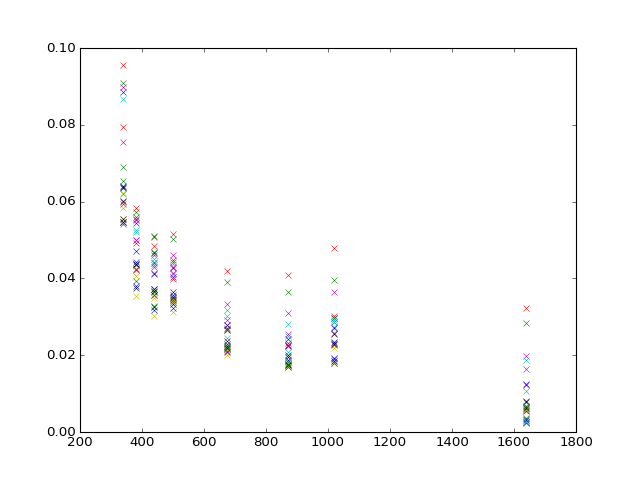

In [33]:
plt.figure()
plt.plot(m['nm'],m['aod'].T,'x')

In [93]:
for i,aa in enumerate(np.nanmean(m['aod'][6:9,:].T,axis=1)):
    if np.isfinite(aa):
        print m['nm'][i],aa

340.0 0.0643296666667
380.0 0.03832
440.0 0.032411
500.0 0.03315
675.0 0.0215423333333
870.0 0.0184973333333
1020.0 0.0240066666667
1640.0 0.004058


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


## Load the El Farafa 2018

In [34]:
e = lu.load_aeronet(fp+'data_other_2018/AERONET/20180102_20180102_El_Farafra.lev20',version=3)

Opening file: /mnt/c/Users/sleblanc/Research/ORACLES/data_other_2018/AERONET/20180102_20180102_El_Farafra.lev20


In [63]:
e['Site_Elevationm'],e['Site_LatitudeDegrees'],e['Site_LongitudeDegrees']

(array([ 92.,  92.,  92.,  92.,  92.,  92.,  92.,  92.,  92.,  92.,  92.,
         92.,  92.,  92.,  92.,  92.,  92.,  92.,  92.,  92.,  92.,  92.,
         92.,  92.,  92.,  92.,  92.,  92.,  92.,  92.,  92.,  92.,  92.,
         92.,  92.,  92.,  92.,  92.,  92.,  92.,  92.,  92.,  92.,  92.,
         92.,  92.,  92.,  92.,  92.,  92.,  92.,  92.,  92.,  92.,  92.,
         92.,  92.,  92.,  92.,  92.,  92.]),
 array([ 27.058,  27.058,  27.058,  27.058,  27.058,  27.058,  27.058,
         27.058,  27.058,  27.058,  27.058,  27.058,  27.058,  27.058,
         27.058,  27.058,  27.058,  27.058,  27.058,  27.058,  27.058,
         27.058,  27.058,  27.058,  27.058,  27.058,  27.058,  27.058,
         27.058,  27.058,  27.058,  27.058,  27.058,  27.058,  27.058,
         27.058,  27.058,  27.058,  27.058,  27.058,  27.058,  27.058,
         27.058,  27.058,  27.058,  27.058,  27.058,  27.058,  27.058,
         27.058,  27.058,  27.058,  27.058,  27.058,  27.058,  27.058,
         27.058,

In [62]:
ke

['340440_Angstrom_Exponent',
 '380500_Angstrom_Exponent',
 '440675_Angstrom_Exponent',
 '440675_Angstrom_ExponentPolar',
 '440870_Angstrom_Exponent',
 '500870_Angstrom_Exponent',
 'AERONET_Instrument_Number',
 'AERONET_Site_Name',
 'AOD_1020nm',
 'AOD_1640nm',
 'AOD_340nm',
 'AOD_380nm',
 'AOD_400nm',
 'AOD_412nm',
 'AOD_440nm',
 'AOD_443nm',
 'AOD_490nm',
 'AOD_500nm',
 'AOD_510nm',
 'AOD_531nm',
 'AOD_532nm',
 'AOD_551nm',
 'AOD_555nm',
 'AOD_560nm',
 'AOD_620nm',
 'AOD_667nm',
 'AOD_675nm',
 'AOD_681nm',
 'AOD_709nm',
 'AOD_779nm',
 'AOD_865nm',
 'AOD_870nm',
 'AOD_Empty',
 'AOD_Empty_1',
 'AOD_Empty_2',
 'AOD_Empty_3',
 'AOD_Empty_4',
 'Data_Quality_Level',
 'Dateddmmyyyy',
 'Day_of_Year',
 'Day_of_YearFraction',
 'Exact_Wavelengths_of_AODum_1020nm',
 'Exact_Wavelengths_of_AODum_1640nm',
 'Exact_Wavelengths_of_AODum_340nm',
 'Exact_Wavelengths_of_AODum_380nm',
 'Exact_Wavelengths_of_AODum_400nm',
 'Exact_Wavelengths_of_AODum_412nm',
 'Exact_Wavelengths_of_AODum_440nm',
 'Exact_Wave

In [36]:
ke = e.keys()
ke.sort()
nm = [float(k[4:-2]) for k in ke if (k.startswith('AOD_')&k.endswith('nm'))]
nm.sort()

In [37]:
eaods = [k for k in ke if (k.startswith('AOD_')&k.endswith('nm'))]
nat_sort(eaods)

In [38]:
em = {}
em['nm'] = nm
em['keys'] = eaods

In [39]:
eaod = []
for i in xrange(len(e['Timehhmmss'])):
    u = [e[d][i] for d in eaods]
    eaod.append(u)
em['aod'] = np.array(eaod)

In [40]:
em['aod'][em['aod']==-999.0]=np.nan

In [43]:
em['aod'].shape

(61, 24)

In [64]:
em['nm']

[340.0,
 380.0,
 400.0,
 412.0,
 440.0,
 443.0,
 490.0,
 500.0,
 510.0,
 531.0,
 532.0,
 551.0,
 555.0,
 560.0,
 620.0,
 667.0,
 675.0,
 681.0,
 709.0,
 779.0,
 865.0,
 870.0,
 1020.0,
 1640.0]

In [60]:
em['aod'][-1,:]

array([ 0.043148,  0.03664 ,       nan,       nan,  0.027803,       nan,
             nan,  0.024037,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,  0.016125,       nan,
             nan,       nan,       nan,  0.014967,  0.013395,  0.010675])

<IPython.core.display.Javascript object>


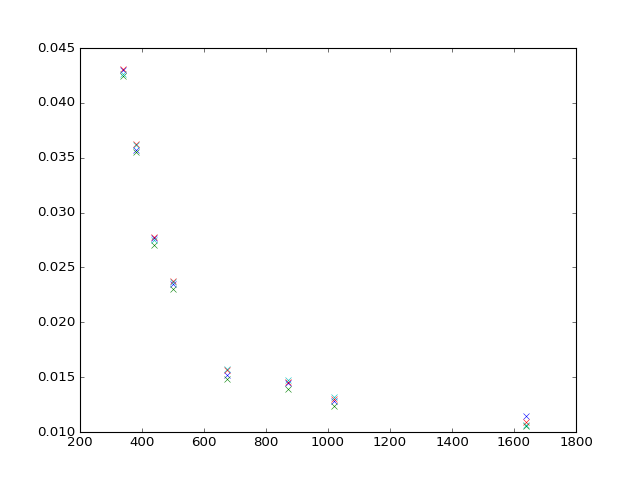

In [61]:
plt.figure()
plt.plot(em['nm'],em['aod'][-5:-1,:].T,'x')

## Load from Ragged point 2018

In [75]:
r = lu.load_aeronet(fp+'data_other_2018/AERONET/20180923_20180923_Ragged_Point.lev15',version=3)

Opening file: /mnt/c/Users/sleblanc/Research/ORACLES/data_other_2018/AERONET/20180923_20180923_Ragged_Point.lev15


In [76]:
kr = r.keys()
kr.sort()
nm = [float(k[4:-2]) for k in kr if (k.startswith('AOD_')&k.endswith('nm'))]
nm.sort()

In [77]:
raods = [k for k in kr if (k.startswith('AOD_')&k.endswith('nm'))]
nat_sort(raods)

In [78]:
rm = {}
rm['nm'] = nm
rm['keys'] = raods

In [79]:
raod = []
for i in xrange(len(r['Timehhmmss'])):
    u = [r[d][i] for d in raods]
    raod.append(u)
rm['aod'] = np.array(raod)

In [80]:
rm['aod'][rm['aod']==-999.0]=np.nan
rm['aod'].shape

(13, 24)

<IPython.core.display.Javascript object>


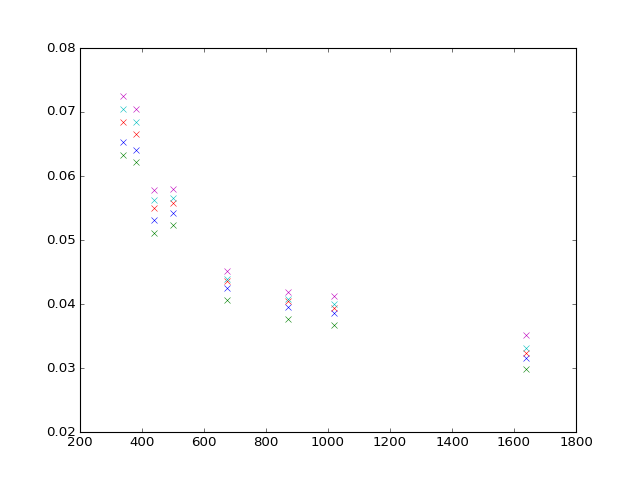

In [83]:
plt.figure()
plt.plot(rm['nm'],rm['aod'][0:5,:].T,'x')

In [88]:
for i,aa in enumerate(np.nanmean(rm['aod'][0:1,:].T,axis=1)):
    if np.isfinite(aa):
        print rm['nm'][i],aa

340.0 0.065345
380.0 0.064
440.0 0.053071
500.0 0.05428
675.0 0.042577
870.0 0.039507
1020.0 0.038518
1640.0 0.031581


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


## Load the La Parguera 2018 (near Barbados)

In [66]:
p = lu.load_aeronet(fp+'data_other_2018/AERONET/20180926_20180926_La_Parguera.lev20',version=3)

Opening file: /mnt/c/Users/sleblanc/Research/ORACLES/data_other_2018/AERONET/20180926_20180926_La_Parguera.lev20


In [67]:
kp = p.keys()
kp.sort()
nm = [float(k[4:-2]) for k in kp if (k.startswith('AOD_')&k.endswith('nm'))]
nm.sort()

In [68]:
paods = [k for k in kp if (k.startswith('AOD_')&k.endswith('nm'))]
nat_sort(paods)

In [69]:
pm = {}
pm['nm'] = nm
pm['keys'] = paods

In [70]:
paod = []
for i in xrange(len(p['Timehhmmss'])):
    u = [p[d][i] for d in paods]
    paod.append(u)
pm['aod'] = np.array(paod)

In [71]:
pm['aod'][pm['aod']==-999.0]=np.nan
pm['aod'].shape

(33, 24)

<IPython.core.display.Javascript object>


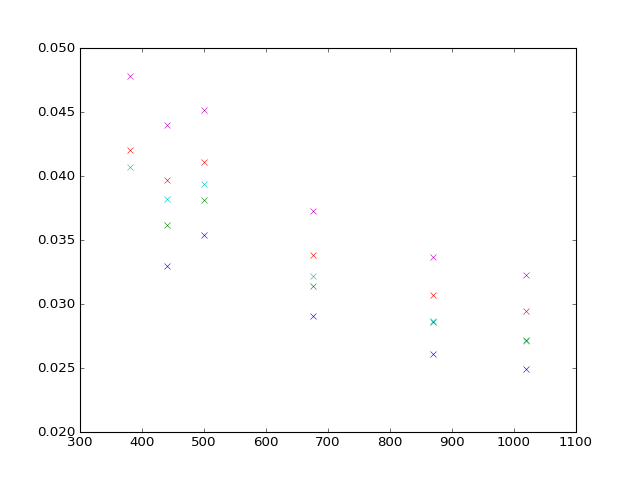

In [74]:
plt.figure()
plt.plot(pm['nm'],pm['aod'][5:10,:].T,'x')

# Plot out the AOD spectra for each point

## Plot out the Mount_Chacaltaya aeronet

<IPython.core.display.Javascript object>


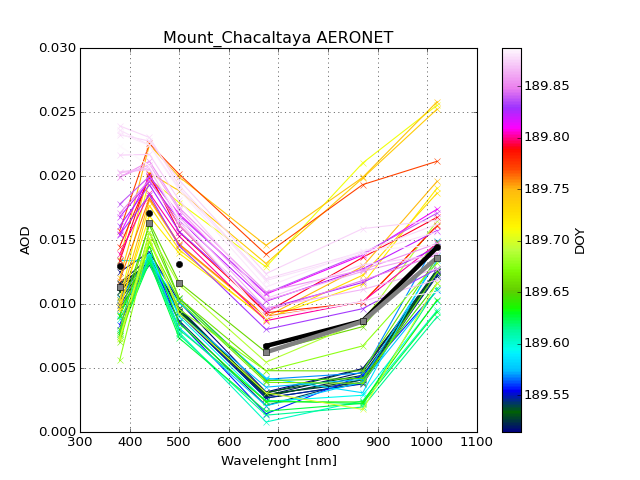

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\ipykernel\__main__.py:2: MatplotlibDeprecationWarning: The normalize class alias was deprecated in version 1.3. Use Normalize instead.
  from ipykernel import kernelapp as app


In [169]:
fig,ax = plt.subplots(1)
s_m = plt.cm.ScalarMappable(cmap=plt.cm.gist_ncar, norm=plt.normalize(vmin=min(a['Julian_Day']),vmax=max(a['Julian_Day'])))
s_m.set_array([])
for i,j in enumerate(a['Julian_Day']):
    im = np.isfinite(a['aod'][i,:])
    plt.plot(np.array(a['wl'])[im],a['aod'][i,im],'x-',color=s_m.to_rgba(j))
plt.plot(a['wl'],np.nanmean(a['aod'],axis=0),'o-k',zorder=200,lw=4)
plt.plot(a['wl'],np.nanmedian(a['aod'],axis=0),'s-',color='grey',zorder=200,lw=4)
plt.title('Mount_Chacaltaya AERONET')
plt.xlabel('Wavelenght [nm]')
plt.ylabel('AOD')
plt.grid()
cb = plt.colorbar(s_m, format='%3.2f')
cb.set_label('DOY')
plt.savefig(fp+'AERONET_Chacaltaya_high_alt_AOD_log_sept_2016.png',dpi=600,transparent=True)

<IPython.core.display.Javascript object>


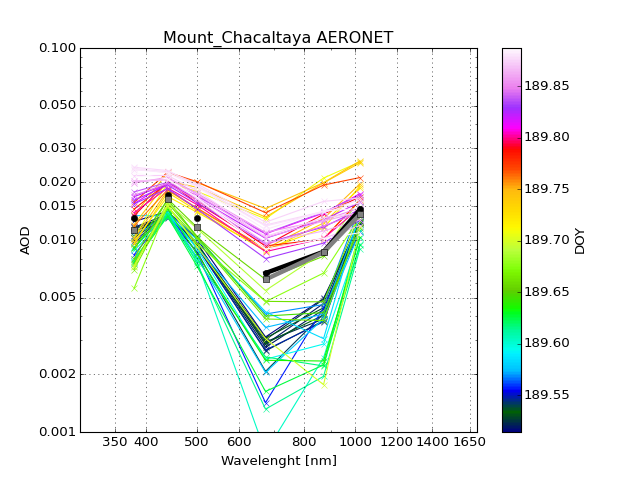

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\ipykernel\__main__.py:2: MatplotlibDeprecationWarning: The normalize class alias was deprecated in version 1.3. Use Normalize instead.
  from ipykernel import kernelapp as app


In [170]:
fig,ax = plt.subplots(1)
s_m = plt.cm.ScalarMappable(cmap=plt.cm.gist_ncar, norm=plt.normalize(vmin=min(a['Julian_Day']),vmax=max(a['Julian_Day'])))
s_m.set_array([])
for i,j in enumerate(a['Julian_Day']):
    im = np.isfinite(a['aod'][i,:])
    plt.plot(np.array(a['wl'])[im],a['aod'][i,im],'x-',color=s_m.to_rgba(j))
plt.plot(a['wl'],np.nanmean(a['aod'],axis=0),'o-k',zorder=200,lw=4)
plt.plot(a['wl'],np.nanmedian(a['aod'],axis=0),'s-',color='grey',zorder=200,lw=4)
plt.title('Mount_Chacaltaya AERONET')
plt.xlabel('Wavelenght [nm]')
plt.ylabel('AOD')
plt.grid()

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(0.001,0.1)
ax.set_xlim(300.0,1700.0)
plt.xticks([350,400,500,600,800,1000,1200,1400,1650])
plt.yticks([0.001,0.002,0.005,0.01,0.015,0.02,0.03,0.05,0.1])
ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
ax.get_yaxis().set_major_formatter(mpl.ticker.ScalarFormatter())

cb = plt.colorbar(s_m, format='%3.2f')
cb.set_label('DOY')
plt.savefig(fp+'AERONET_Chacaltaya_high_alt_AOD_log_sept_2016.png',dpi=600,transparent=True)

## Plot out the MLO AERONET

<IPython.core.display.Javascript object>


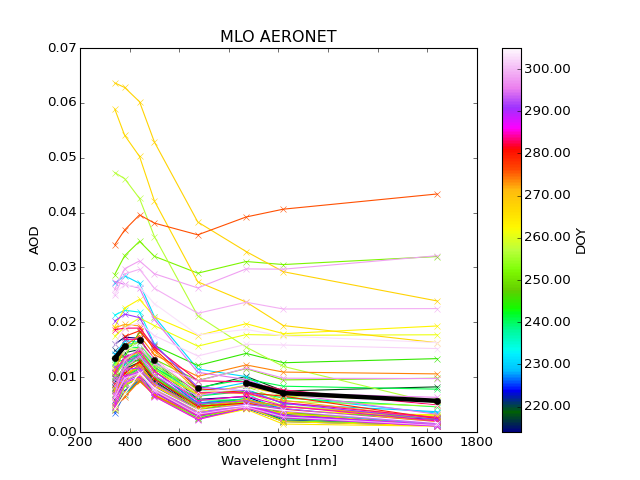

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\ipykernel\__main__.py:2: MatplotlibDeprecationWarning: The normalize class alias was deprecated in version 1.3. Use Normalize instead.
  from ipykernel import kernelapp as app


In [166]:
fig,ax = plt.subplots(1)
s_m = plt.cm.ScalarMappable(cmap=plt.cm.gist_ncar, norm=plt.normalize(vmin=min(b['Day_of_Year']),vmax=max(b['Day_of_Year'])))
s_m.set_array([])
for i,j in enumerate(b['Day_of_Year']):
    b['aod'][i,b['aod'][i,:]==-999] = np.nan
    im = np.isfinite(b['aod'][i,:])
    plt.plot(np.array(b['wl'])[im],b['aod'][i,im],'x-',color=s_m.to_rgba(j))
plt.plot(b['wl'],np.nanmean(b['aod'],axis=0),'o-k',zorder=200,lw=4)
plt.title('MLO AERONET')
plt.xlabel('Wavelenght [nm]')
plt.ylabel('AOD')
cb = plt.colorbar(s_m, format='%3.2f')
cb.set_label('DOY')
plt.savefig(fp+'AERONET_MLO_high_alt_AOD_sept_2016.png',dpi=600,transparent=True)

<IPython.core.display.Javascript object>


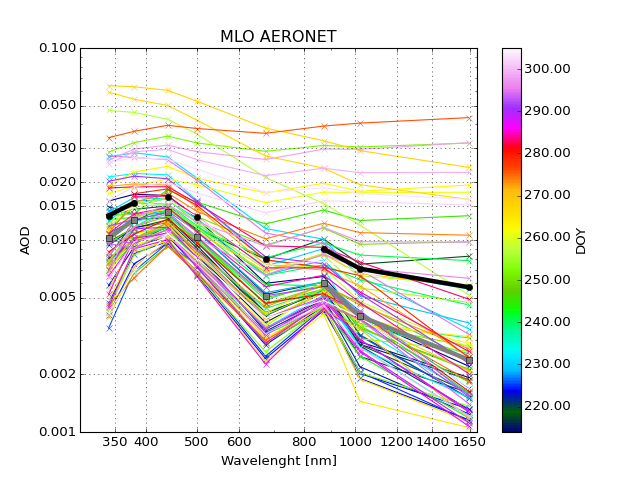

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\ipykernel\__main__.py:2: MatplotlibDeprecationWarning: The normalize class alias was deprecated in version 1.3. Use Normalize instead.
  from ipykernel import kernelapp as app


In [165]:
fig,ax = plt.subplots(1)
s_m = plt.cm.ScalarMappable(cmap=plt.cm.gist_ncar, norm=plt.normalize(vmin=min(b['Day_of_Year']),vmax=max(b['Day_of_Year'])))
s_m.set_array([])
for i,j in enumerate(b['Day_of_Year']):
    b['aod'][i,b['aod'][i,:]==-999] = np.nan
    im = np.isfinite(b['aod'][i,:])
    plt.plot(np.array(b['wl'])[im],b['aod'][i,im],'x-',color=s_m.to_rgba(j))
plt.plot(b['wl'],np.nanmean(b['aod'],axis=0),'o-k',zorder=200,lw=4)
plt.plot(b['wl'],np.nanmedian(b['aod'],axis=0),'s-',color='grey',zorder=200,lw=4)
plt.title('MLO AERONET')
plt.xlabel('Wavelenght [nm]')
plt.ylabel('AOD')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(0.001,0.1)
ax.set_xlim(300.0,1700.0)
plt.xticks([350,400,500,600,800,1000,1200,1400,1650])
plt.yticks([0.001,0.002,0.005,0.01,0.015,0.02,0.03,0.05,0.1])
ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
ax.get_yaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
plt.grid()

cb = plt.colorbar(s_m, format='%3.2f')
cb.set_label('DOY')
plt.savefig(fp+'AERONET_MLO_high_alt_AOD_log_sept_2016.png',dpi=600,transparent=True)

In [162]:
np.array(b['wl'])[im],np.nanmean(b['aod'][:,im],axis=0),np.nanmedian(b['aod'][:,im],axis=0)

(array([  340.,   380.,   440.,   500.,   675.,   870.,  1020.,  1640.]),
 array([ 0.01341534,  0.01563484,  0.01673158,  0.01320213,  0.00794751,
         0.00896252,  0.00709206,  0.00568186]),
 array([ 0.010195,  0.01278 ,  0.013907,  0.010327,  0.005127,  0.005983,
         0.004015,  0.002382]))

<IPython.core.display.Javascript object>


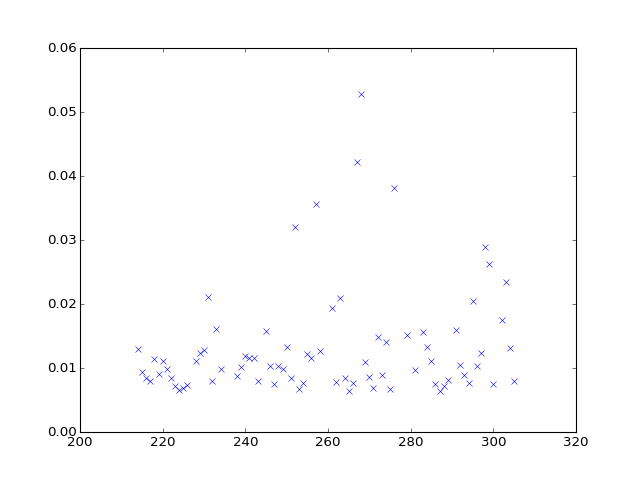

In [172]:
plt.figure()
plt.plot(b['Day_of_Year'],b['aod'][:,7],'x')

# Test out the aeronet aerosol properties in sao tome for ORACLES 2017

In [11]:
from json_tricks import dump, dumps, load, loads, strip_comments

In [12]:
ff = '/mnt/c/Users/sleblanc/Research/ORACLES/aero_file_v2.txt'

In [13]:
n = load(ff)

In [14]:
n.keys()

[u'wvl_arr', u'disort_phase', u'asy', u'ext', u'expand_hg', u'z_arr', u'ssa']

In [15]:
n['asy'].shape

(2, 12)

<IPython.core.display.Javascript object>


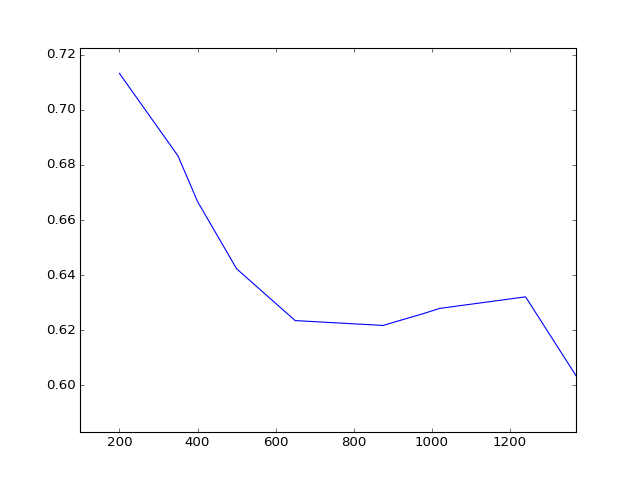

In [13]:
plt.figure()
plt.plot(n['wvl_arr'],n['asy'][0,:])

In [22]:
aero_asy = [0.702247,0.580717,0.520858,0.504244]
aero_wvl = [440.0,674.0,870.0,1020.0]

In [21]:
new_asy = [ 0.75  ,  0.71,  0.69,  0.645,  0.58,
         0.52,  0.512,  0.51,  0.49 ,  0.45,
         0.427843  ,  0.377843  ]

<IPython.core.display.Javascript object>


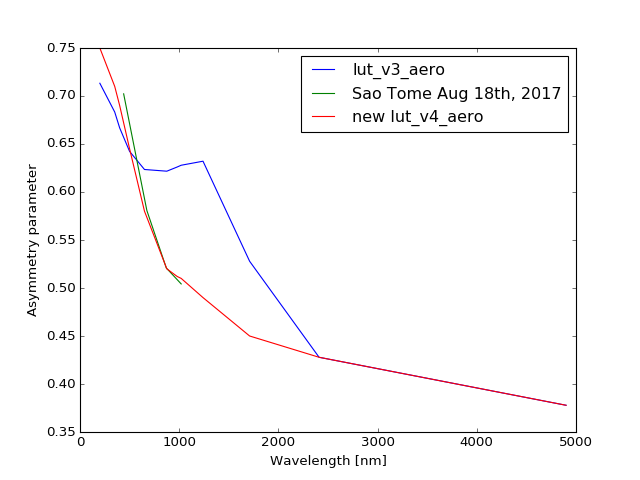

In [87]:
plt.figure()
plt.plot(n['wvl_arr'],n['asy'][0,:],label='lut_v3_aero')
plt.plot(aero_wvl,aero_asy,label='Sao Tome Aug 18th, 2017')
plt.plot(n['wvl_arr'],new_asy,label='new lut_v4_aero')
plt.legend()
plt.xlabel('Wavelength [nm]')
plt.ylabel('Asymmetry parameter')
plt.savefig('/mnt/c/Users/sleblanc/Research/ORACLES/aero_asy_v4.png',dpi=600,transparent=True)

<IPython.core.display.Javascript object>


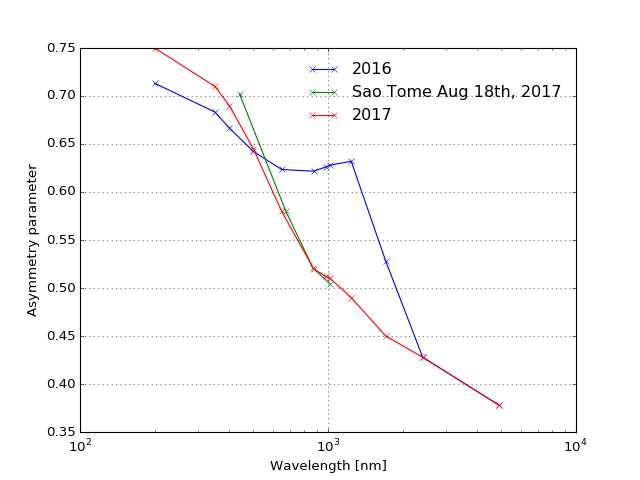

In [89]:
plt.figure()
plt.plot(n['wvl_arr'],n['asy'][0,:],'x-',label='2016')
plt.plot(aero_wvl,aero_asy,'x-',label='Sao Tome Aug 18th, 2017')
plt.plot(n['wvl_arr'],new_asy,'x-',label='2017')
plt.gca().set_xscale('log')
plt.legend(frameon=False)
plt.xlabel('Wavelength [nm]')
plt.ylabel('Asymmetry parameter')
plt.grid()
plt.savefig('/mnt/c/Users/sleblanc/Research/ORACLES/aero_asy_v4_yr.png',dpi=600,transparent=True)

In [20]:
aero_ssa = [0.869100,0.863700,0.849200,0.840400]
aero_ssa2 = [0.899500,0.889300,0.865900,0.843400]

In [19]:
new_ssa = [ 0.885  ,  0.88,  0.878 ,  0.875,  0.87 ,
        0.851,  0.841,  0.838 ,  0.82,  0.79110621,
        0.761106  ,  0.721106  ]

<IPython.core.display.Javascript object>


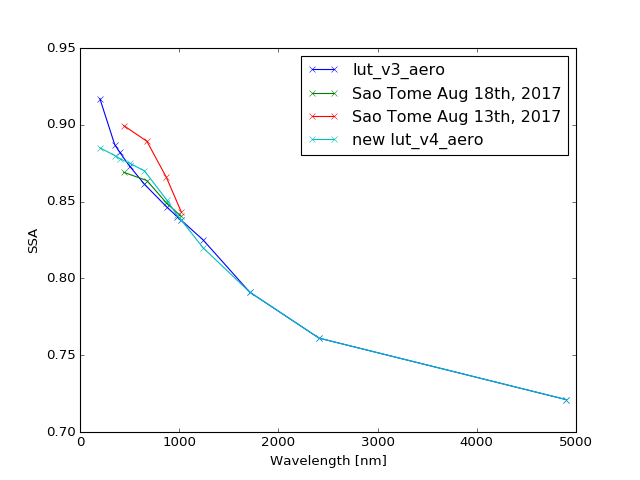

In [69]:
plt.figure()
plt.plot(n['wvl_arr'],n['ssa'][0,:],'x-',label='lut_v3_aero')
plt.plot(aero_wvl,aero_ssa,'x-',label='Sao Tome Aug 18th, 2017')
plt.plot(aero_wvl,aero_ssa2,'x-',label='Sao Tome Aug 13th, 2017')
plt.plot(n['wvl_arr'],new_ssa,'x-',label='new lut_v4_aero')
plt.legend()
plt.xlabel('Wavelength [nm]')
plt.ylabel('SSA')
plt.savefig('/mnt/c/Users/sleblanc/Research/ORACLES/aero_ssa_v4.png',dpi=600,transparent=True)

In [71]:
import numpy as np

In [17]:
aero_ext = np.array([0.703200,0.357900,0.227200,0.164300])/3.0

In [18]:
new_ext = n['ext'][0,:]*1.4

<IPython.core.display.Javascript object>


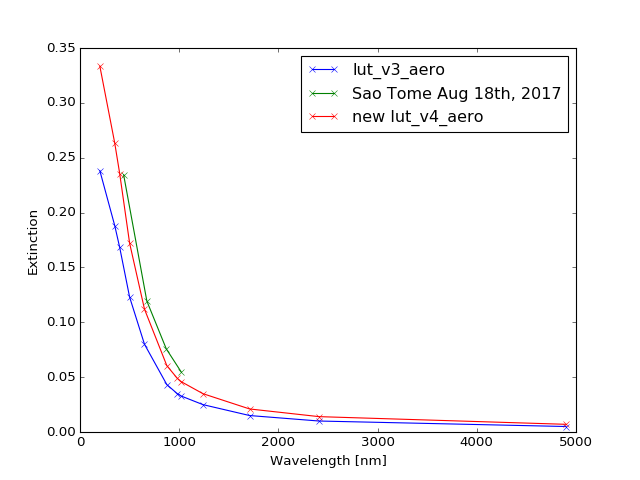

In [76]:
plt.figure()
plt.plot(n['wvl_arr'],n['ext'][0,:],'x-',label='lut_v3_aero')
plt.plot(aero_wvl,aero_ext,'x-',label='Sao Tome Aug 18th, 2017')
#plt.plot(aero_wvl,aero_ssa2,'x-',label='Sao Tome Aug 13th, 2017')
plt.plot(n['wvl_arr'],new_ext,'x-',label='new lut_v4_aero')
plt.legend()
plt.xlabel('Wavelength [nm]')
plt.ylabel('Extinction')
plt.savefig('/mnt/c/Users/sleblanc/Research/ORACLES/aero_ext_v4.png',dpi=600,transparent=True)

In [9]:
ssa_4star = [0.820466265,0.803721687,0.757131325,0.733398795]
ssa_4star_std = [0.031832575,0.032310169,0.040917537,0.046946279]
wvl_4star = [440.0,675.0,870.0,995.0]

<IPython.core.display.Javascript object>


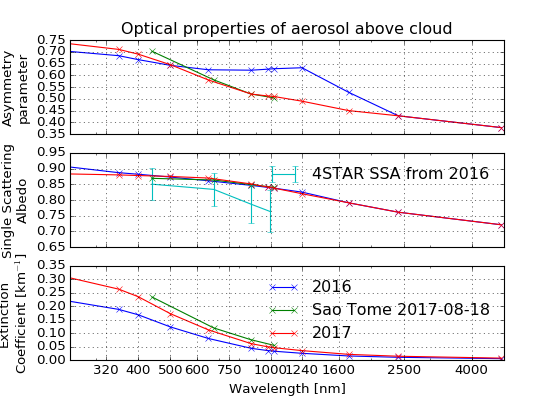

In [37]:
fig,ax = plt.subplots(3,sharex=True,figsize=(7,5))
ax = ax.ravel()


ax[0].plot(n['wvl_arr'],n['asy'][0,:],'x-',label='2016')
ax[0].plot(aero_wvl,aero_asy,'x-',label='Sao Tome Aug 18th, 2017')
ax[0].plot(n['wvl_arr'],new_asy,'x-',label='2017')
ax[0].set_xscale('log')

#ax[0].set_xlabel('Wavelength [nm]')
ax[0].set_ylabel('Asymmetry\nparameter')
ax[0].grid()
ax[0].set_title('Optical properties of aerosol above cloud')

ax[1].plot(n['wvl_arr'],n['ssa'][0,:],'x-')
ax[1].plot(aero_wvl,aero_ssa,'x-')
ax[1].plot(n['wvl_arr'],new_ssa,'x-')
ax[1].errorbar(wvl_4star,np.array(ssa_4star)+0.03,yerr=(np.array(ssa_4star_std)+0.02),label='4STAR SSA from 2016')
#ax[0].set_xlabel('Wavelength [nm]')
ax[1].set_ylabel('Single Scattering\nAlbedo')
ax[1].grid()
ax[1].legend(frameon=False)

ax[2].plot(n['wvl_arr'],n['ext'][0,:],'x-',label='2016')
ax[2].plot(aero_wvl,aero_ext,'x-',label='Sao Tome 2017-08-18')
ax[2].plot(n['wvl_arr'],new_ext,'x-',label='2017')
ax[2].set_ylabel('Extinction\nCoefficient [km$^{{-1}}$]')
ax[2].grid()
ax[2].legend(frameon=False)
ax[2].set_xlabel('Wavelength [nm]')
ax[2].set_xlim(250,5000)
ax[2].set_xticks([320,400,500,600,750,1000,1240,1600,2500,4000])
ax[2].set_xticklabels([320,400,500,600,750,1000,1240,1600,2500,4000])


plt.savefig('/mnt/c/Users/sleblanc/Research/ORACLES/aero_v4_yr.png',dpi=600,transparent=True)

In [78]:
n['asy'][0,:] = new_asy
n['ssa'][0,:] = new_ssa
n['ext'][0,:] = new_ext

In [79]:
help(dump)

Help on function dump in module json_tricks.nonp:

dump(obj, fp, sort_keys=None, cls=<class 'json_tricks.encoders.TricksEncoder'>, obj_encoders=[<function pandas_encode>, <function numpy_encode>, <function enum_instance_encode>, <function json_date_time_encode>, <function json_complex_encode>, <function json_set_encode>, <function numeric_types_encode>, <function class_instance_encode>], extra_obj_encoders=(), primitives=False, compression=None, force_flush=False, allow_nan=False, conv_str_byte=False, **jsonkwargs)
    Convert a nested data structure to a json string.
    
    :param fp: File handle or path to write to.
    :param compression: The gzip compression level, or None for no compression.
    :param force_flush: If True, flush the file handle used, when possibly also in the operating system (default False).
    
    The other arguments are identical to `dumps`.



In [80]:
dump(n,'/mnt/c/Users/sleblanc/Research/ORACLES/aero_file_v4.txt')

u'{"wvl_arr": [200.0, 350.0, 400.0, 500.0, 650.0, 875.0, 980.0, 1020.0, 1240.0, 1710.0, 2410.0, 4900.0], "disort_phase": false, "asy": {"__ndarray__": [[0.75, 0.71, 0.69, 0.645, 0.58, 0.52, 0.512, 0.51, 0.49, 0.45, 0.427843, 0.377843], [0.713289, 0.6832887186675176, 0.6667278373355593, 0.6422770880898676, 0.6234434524409853, 0.621676248488346, 0.6260576101037892, 0.6278665763472377, 0.6320781961337258, 0.527842778326634, 0.427843, 0.377843]], "dtype": "float64", "shape": [2, 12], "Corder": true}, "ext": {"__ndarray__": [[0.333445, 0.2634456435839335, 0.23560441335042315, 0.17216642101605734, 0.1119781345129013, 0.060532093048095696, 0.049, 0.045883087317148845, 0.03490221947431564, 0.020999999999999998, 0.013999999999999999, 0.006999999999999999], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]], "dtype": "float64", "shape": [2, 12], "Corder": true}, "expand_hg": true, "z_arr": [2.0, 5.0], "ssa": {"__ndarray__": [[0.885, 0.88, 0.878, 0.875, 0.87, 0.851, 0.841, 0.838, 0.82,